# Ford Gobike Data Exploration
## by Adrian Alviuri

## Preliminary Wrangling

> Bay Wheels (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. The dataset used for this exploratory analysis consists of [monthly individual trip data](https://www.lyft.com/bikes/bay-wheels/system-data) from January 2018 to December 2018 in CSV format covering the greater San Francisco Bay area

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
import geopy.distance

%matplotlib inline

In [3]:
#Gathering data from csv files and joinin it
folder_name = 'Data'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
final = pd.concat(frames, ignore_index=True)
final.shape

(1863721, 16)

In [4]:
#creating a final csv file to do the analysis
final.to_csv('fordgobike_trips_2018.csv', index=False)

In [3]:
#loading the database
df_bike_trips_18 = pd.read_csv('fordgobike_trips_2018.csv')
df_bike_trips_18.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [7]:
#visual assessment (df.info)
df_bike_trips_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [8]:
#checking if there's any nulls 
df_bike_trips_18.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [9]:
#checking for duplicates
df_bike_trips_18.duplicated().sum()

0

In [10]:
#checking values in member_gender column
df_bike_trips_18.member_gender.value_counts()

Male      1288085
Female     438188
Other       27081
Name: member_gender, dtype: int64

In [11]:
#assessing user_types
df_bike_trips_18.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

**Quality Issues**

- Incorrect data types.
- Create new columns using start time and duration sec columns.
- Create age column.
- Check for outliers and delete them.
- 'member_birth_year' and 'member_age' to integer data type.
- Create new columns using lat and log columns


## Clean

**copy**

In [4]:
#copying df to clean 
df_bt_18 = df_bike_trips_18.copy()

**define**

- Incorrect data types.

**code**

In [5]:
#Setting the right data types of each variable
df_bt_18['start_time'] = pd.to_datetime(df_bt_18['start_time'])
df_bt_18['end_time'] = pd.to_datetime(df_bt_18['end_time'])
df_bt_18['start_station_id'] = df_bt_18['start_station_id'].astype('str')
df_bt_18['end_station_id'] = df_bt_18['end_station_id'].astype('str')
df_bt_18['bike_id'] = df_bt_18['bike_id'].astype('str')
df_bt_18['user_type'] = df_bt_18['user_type'].astype('category')
df_bt_18['member_gender'] = df_bt_18['member_gender'].astype('category')

**test**

In [6]:
#df.info to check the data types
df_bt_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        float64       
 14  member_gender            category      
 15  bike_share_for_all_trip  object        
dtypes: category(2), datetime64[ns](2), float64(5), int64(1), object(6)
memor

**define**

- Create new columns using start time and duration sec columns.

**code**

In [7]:
#Creating new columns for better analysis
df_bt_18['duration_min'] = df_bt_18['duration_sec']/60

df_bt_18['start_date'] = df_bt_18.start_time.dt.strftime('%Y-%m-%d')
df_bt_18['start_hourofday'] = df_bt_18.start_time.dt.strftime('%H')
df_bt_18['start_dayofweek'] = df_bt_18.start_time.dt.strftime('%A')
df_bt_18['start_month'] = df_bt_18.start_time.dt.strftime('%B')

**test**

In [8]:
df_bt_18.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_date,start_hourofday,start_dayofweek,start_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,2765,Subscriber,1986.0,Male,No,1254.733333,2018-01-31,22,Wednesday,January
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,2815,Customer,NaN,NaN,No,1423.700000,2018-01-31,16,Wednesday,January
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,3039,Customer,1996.0,Male,No,1192.933333,2018-01-31,14,Wednesday,January
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,...,321,Customer,NaN,NaN,No,1017.933333,2018-01-31,14,Wednesday,January
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,617,Subscriber,1991.0,Male,No,666.100000,2018-01-31,19,Wednesday,January


**define**
- Create age column.

**code**

In [9]:
#Later on, age will be neccesary for the analysis
df_bt_18['member_age'] = 2019 - df_bt_18['member_birth_year']

**test**

In [10]:
df_bt_18.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_date,start_hourofday,start_dayofweek,start_month,member_age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,1254.733333,2018-01-31,22,Wednesday,January,33.0
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,NaN,NaN,No,1423.700000,2018-01-31,16,Wednesday,January,NaN
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,No,1192.933333,2018-01-31,14,Wednesday,January,23.0
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,...,Customer,NaN,NaN,No,1017.933333,2018-01-31,14,Wednesday,January,NaN
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,No,666.100000,2018-01-31,19,Wednesday,January,28.0


**define**

- Check for outliers and delete them.


**code**

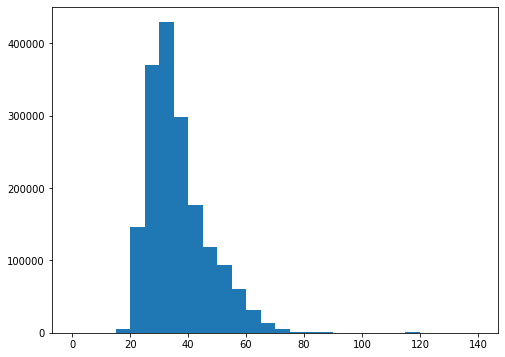

In [11]:
#Checking for outliers
plt.figure(figsize=[8, 6])
bins = np.arange(0, df_bt_18['member_age'].max()+5, 5)
plt.hist(df_bt_18['member_age'].dropna(), bins=bins);

In [12]:
#Removing outliers for a better analysis
df_bt_18 = df_bt_18.query('member_age <= 70')
df_bt_18['member_birth_year'] = df_bt_18['member_birth_year'].astype('int')
df_bt_18['member_age'] = df_bt_18['member_age'].astype('int')


In [13]:
df_bt_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745188 entries, 0 to 1863719
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        int32         
 14  member_gender            category      
 15  bike_share_for_all_trip  object        
 16  duration_min             float64       
 17  start_date               ob

In [14]:
df_bt_18.start_station_latitude.min()

37.26331

**define**
- Create km column to find the distance taken by each ride

**code**

In [15]:
df_bt_18['Distance'] = df_bt_18[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']].apply(lambda x: geopy.distance.distance((x[0],x[1]), (x[2],x[3])).km, axis=1)

**test**

In [17]:
df_bt_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1745188 entries, 0 to 1863719
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        int32         
 14  member_gender            category      
 15  bike_share_for_all_trip  object        
 16  duration_min             float64       
 17  start_date               ob

### What is the structure of your dataset?

> The original combined data contains approximately 1,860,000 individual trip records with 16 variables collected. The variables can be divided into 3 major categories:trip duration, station information and support variables which where added to help the analysis.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in analyzing bike trips' duration and rental events occurrance patterns. Plus, how these relate to some demographics (user type, gender and age). 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following features will help to support my investigation: trip's start date/time and duration information and demographics like user type, gender and age.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

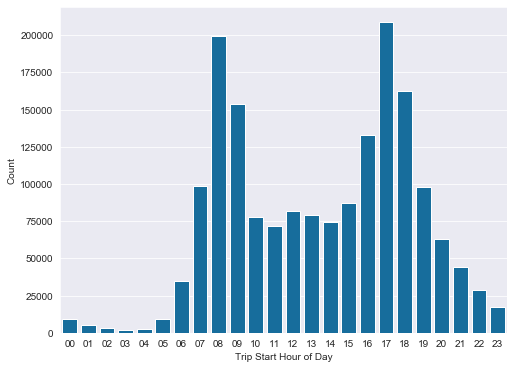

In [12]:
#plotting how many rides are taken in different hours during a day
plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid') 

sb.countplot(data=df_bt_18, x='start_hourofday', color=base_color);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

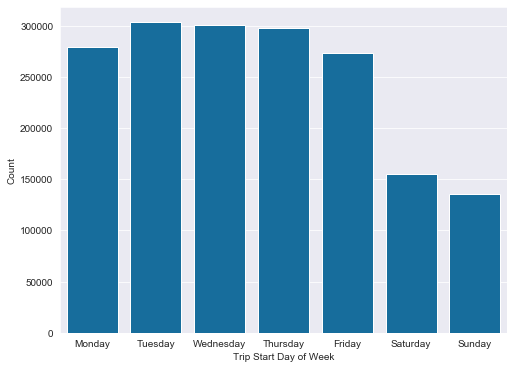

In [13]:
#Plotting the rides taken in each day of a week
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df_bt_18['start_dayofweek'] = df_bt_18['start_dayofweek'].astype(weekdaycat)

sb.countplot(data=df_bt_18, x='start_dayofweek', color=base_color);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

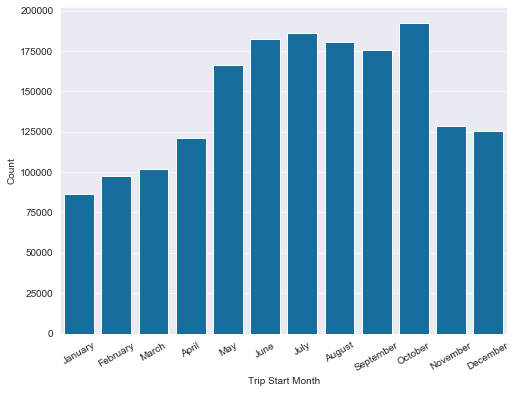

In [32]:
#Plotting rides in each month of a year
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df_bt_18['start_month'] = df_bt_18['start_month'].astype(monthcat)

sb.countplot(data=df_bt_18, x='start_month', color=base_color);
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month');
plt.ylabel('Count');

> In the first distribution, we can see that bikes are most used at 8am and 5pm. This can tell us that bikes are being used when people go to work and leave. When we see the trip distribution over day of week plot, the vast majority of rides takes play between monday to friday (work days). Compared to other months, october has the most trip, but people tend to use bikes in summer. That's why we can see more use between May and September.

Text(0.5, 1.0, 'Quantity of users by type')

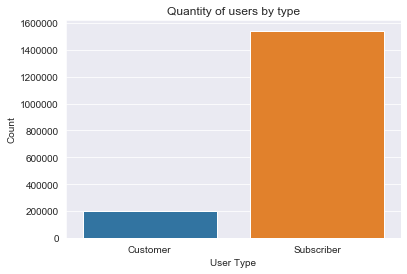

In [28]:
#Plotting the quantity of user types
sb.countplot(data=df_bt_18, x='user_type');
plt.xlabel('User Type');
plt.ylabel('Count');
plt.title('Quantity of users by type')

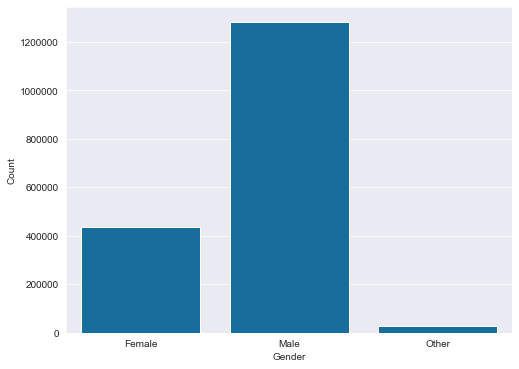

In [34]:
#Bar plot of members gender
sb.countplot(data=df_bt_18, x='member_gender', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Count');

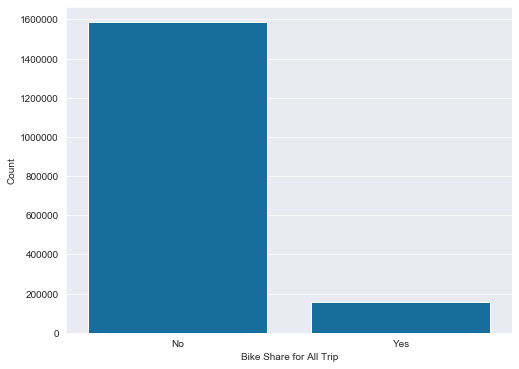

In [35]:
#Bar plot of bike share for all trip  
sb.countplot(data=df_bt_18, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

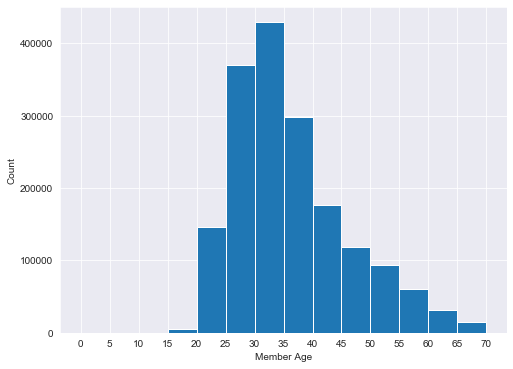

In [36]:
#Distribution of members age
bins = np.arange(0, df_bt_18['member_age'].max()+5, 5)
plt.hist(data=df_bt_18, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');

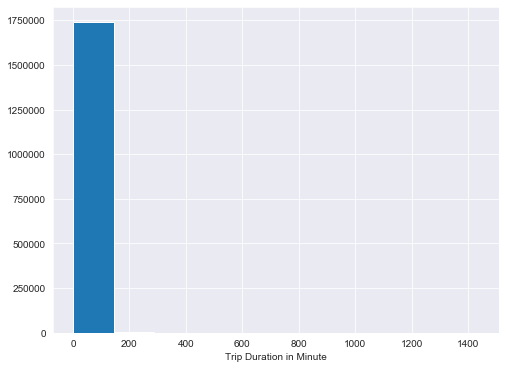

In [14]:
#Plotting trip duration in minutes 
plt.hist(data=df_bt_18, x='duration_min');
plt.xlabel('Trip Duration in Minute');

> The distribution indicates that there are outliers. That's why i'll make a zoom in to have a better chart.

In [17]:
#Describing data to see how should treat data
df_bt_18['duration_min'].describe()

count    1.745188e+06
mean     1.296786e+01
std      3.311037e+01
min      1.016667e+00
25%      5.750000e+00
50%      9.050000e+00
75%      1.401667e+01
max      1.438017e+03
Name: duration_min, dtype: float64

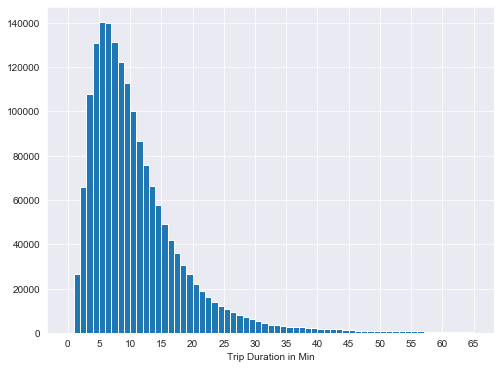

In [16]:
#Adjusting the x - axis. Investigating further on an even smaller bin size
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df_bt_18, x='duration_min', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Min');

In [18]:
#Removing outliers for better analysis
df_bt_18 = df_bt_18.query('duration_min <= 66')
df_bt_18.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727985 entries, 6 to 1863719
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1727985 non-null  int64         
 1   start_time               1727985 non-null  datetime64[ns]
 2   end_time                 1727985 non-null  datetime64[ns]
 3   start_station_id         1727985 non-null  object        
 4   start_station_name       1716963 non-null  object        
 5   start_station_latitude   1727985 non-null  float64       
 6   start_station_longitude  1727985 non-null  float64       
 7   end_station_id           1727985 non-null  object        
 8   end_station_name         1716963 non-null  object        
 9   end_station_latitude     1727985 non-null  float64       
 10  end_station_longitude    1727985 non-null  float64       
 11  bike_id                  1727985 non-null  object        
 12  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We can see that bikes are most used at 8am and 5pm. This can tell us that bikes are being used when people go to work and leave. When we see the trip distribution over day of week plot, the vast majority of rides takes play between monday to friday (work days). Compared to other months, october has the most trip, but people tend to use bikes in summer. That's why we can see more use between May and September.
We can see that there were more male riders than female and most members were subscribers. Also, members did not use bike share for all of their trips and the age of the vast majority of members is between 25 and 45.
Most of the rides didn't last much. Nevertheless, we can see some outliers like 24hrs.
Finally, i didn't need to perform any transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>At first sight, the trip duration chart distribution was unusual. I perform the following operations to adjust the form of the data: set a smaller range where most trip records fell and filtered out the outlier in order to study the most common situations.

## Bivariate Exploration

> **To start off with, i want to look at the pairwise correlations presents between features in the data**

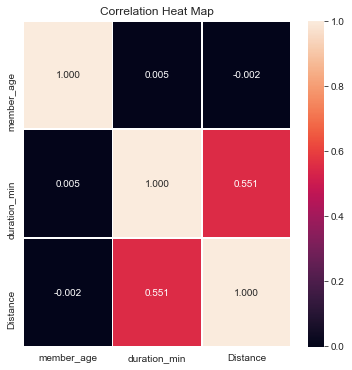

In [49]:
# correlation plot
numeric_vars = ['member_age', 'duration_min', 'Distance']

fig_size,ax = plt.subplots(figsize=(6, 6))
sb.heatmap(df_bt_18[numeric_vars].corr(), annot=True, linewidths=.8, 
            fmt= '.3f',ax=ax)
plt.title('Correlation Heat Map');

- As shown in the chart above, age is not correlated with duration and distance. This is because the vast majority of rides represents short distances.
- Nevertheless, trip duration and distance are moderately correlated.

> **Trip duration by gender**

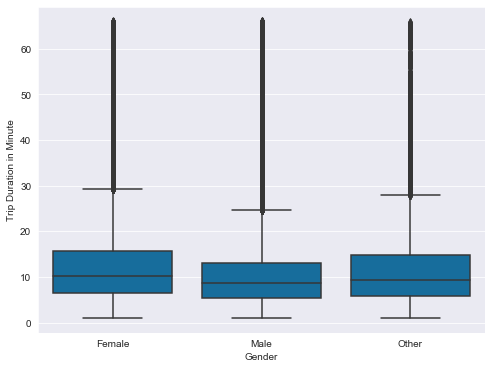

In [54]:
#Box plot to see the distribution of trup duration by gender
sb.boxplot(data=df_bt_18, x='member_gender', y='duration_min', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');

- We can see that there's not much different between genders, but it seems that males tend to have shorter trips than females. We can infere that the vast majority of men tends to ride faster than women the same number of kilometers.

> **Member age by user type**

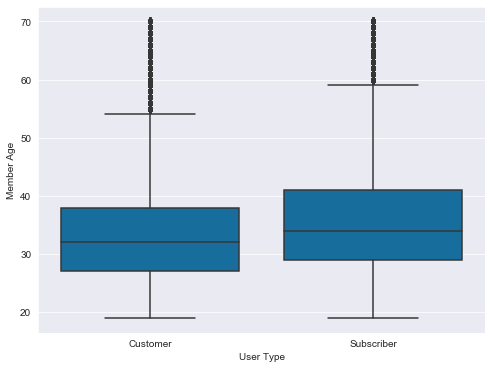

In [55]:
#Box plot to see distribution of ages by user type
sb.boxplot(data=df_bt_18, x='user_type', y='member_age', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Member Age');

- We can see that subscribers are slightly older than customers.

> **Monthly usage by user type**

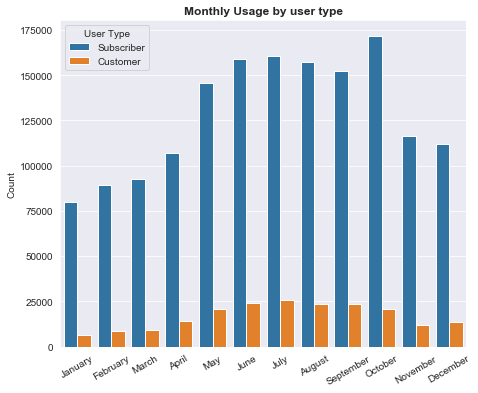

In [25]:
#bar plot
sorted_vals = df_bt_18.user_type.value_counts()/df_bt_18.shape[0];
plt.figure(figsize=[16, 6]);
sb.set_style('darkgrid');

plt.subplot(1, 2, 2);
ax = sb.countplot(data=df_bt_18, x='start_month', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');
plt.title('Monthly Usage by user type', fontweight='semibold');


- Both user types tend to ride more during the summer.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribers takes more rides than customers and the data shows that subscribers are slightly older than customers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It'ss interesting to observe that subscribers are older than customers.

## Multivariate Exploration

> **Average trip duration between customers and subscribers in a week**

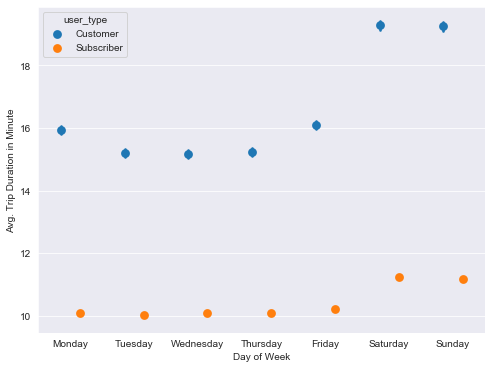

In [57]:
#Plotting different variables 
sb.pointplot(data=df_bt_18, x='start_dayofweek', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

>In general, we can see that subscribers take shorter trips than customers.The trips taken by customers and subs increase on weekends. 

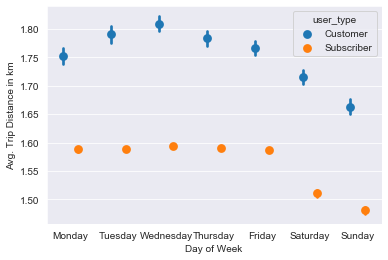

In [50]:
#Plotting different variables (day of week, distance and user_type)
sb.pointplot(data=df_bt_18, x='start_dayofweek', y='Distance', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Distance in km');

> As shown in the chart above, we can see that the distance done by subscribers is shorter. Moreover, we can find that the distance in both user types reduces. 

> Surprisingly, on weekends we can see that people reduces the distance but trip gets longer. We can infer that the rides are for leisure activities.

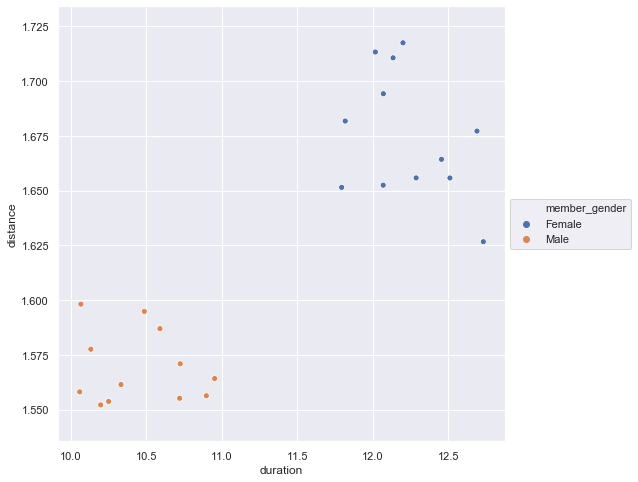

In [61]:
#scatterplot 
distance_duration=df_bt_18.groupby(['member_gender','start_month']).agg(
                    distance=('Distance','mean'),
                    duration=('duration_min','mean'))
distance_duration.reset_index(inplace=True)
Other=distance_duration[distance_duration['member_gender'].str.contains('Other')]
distance_duration.drop(Other.index,inplace=True)

sp =sb.scatterplot(data=distance_duration, x="duration", y="distance",
              hue="member_gender");

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sb.set(rc={'figure.figsize':(5,5)})



> As shown above, we can validate that duration and distance is morately correlated with the ride duration. As well, we can see that men tend to ride faster than women.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The usage for subscribers corresponds to their high concentration on rush hours Monday through Friday which indicates that the use is for work commute in the vast majority of cases. 

### Were there any interesting or surprising interactions between features?

The interactions between features behaved as expected, there's no big surprise observed. There were more male data collected, but the only thing that could be is that males take shorter rides than women.

In [58]:
df_bt_18.to_csv('fordgobike_trips_2018_II.csv', index=False)